In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import r2_score
import math

In [2]:
df = pd.read_csv('AirPassengers.csv')
df.head(15)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [3]:
df.shape

(144, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df['Month'] = df['Month'].apply(lambda x : dt(int(x[0:4]), int(x[5:]), 10))
df = df.set_index('Month')
df.head()

,#Passengers
Month,
1949-01-10,112
1949-02-10,118
1949-03-10,132
1949-04-10,129
1949-05-10,121


In [6]:
ts = df['#Passengers']

Text(0, 0.5, 'No. of Passengers -->')

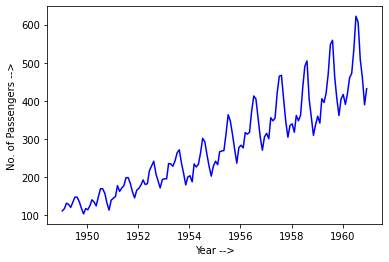

In [7]:
plt.plot(ts, c='blue')
plt.xlabel('Year -->')
plt.ylabel('No. of Passengers -->')

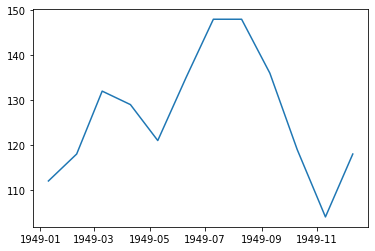

In [8]:
plt.plot(df['1949-01-10':'1949-12-10'])

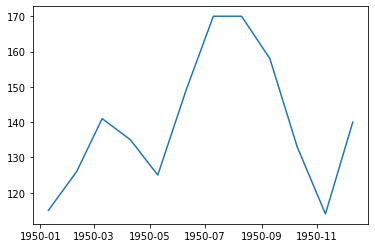

In [9]:
plt.plot(df['1950-01-10':'1950-12-10'])

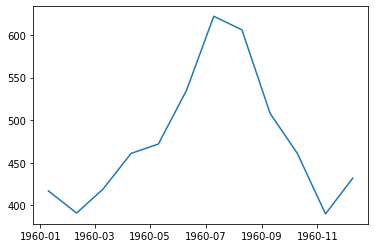

In [10]:
plt.plot(df['1960-01-10':'1960-12-10'])

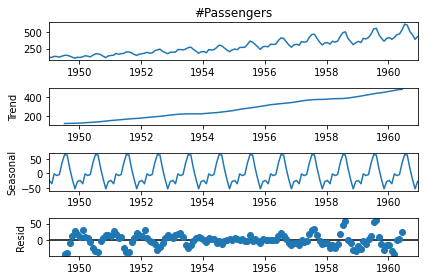

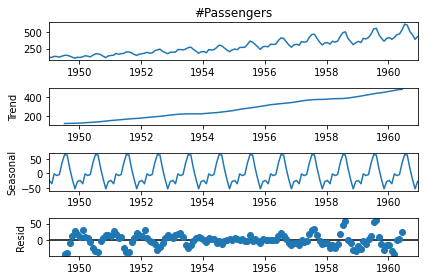

In [11]:
ts_d = seasonal_decompose(ts, model='additive', period=12)
ts_d.plot()

The TimeSeries has some trend with seasonality. 
#### Log Transformation is applied on the original TimeSeries

In [12]:
ts_log = np.log(ts)

Text(0, 0.5, 'No. of Passengers (log) -->')

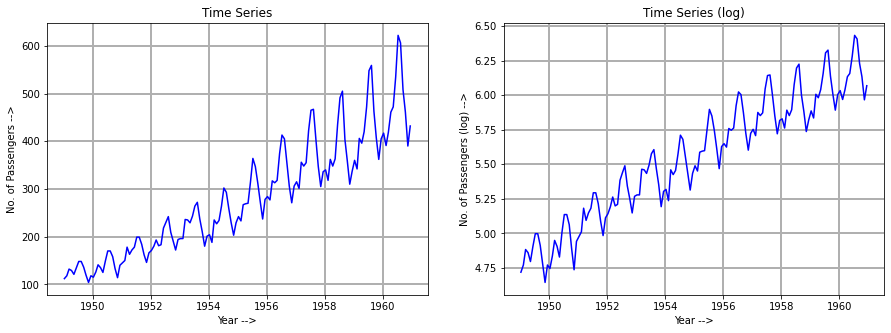

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
# ax1
ax1.plot(ts, c='blue')
ax1.grid(linewidth=2)
ax1.set_title('Time Series')
ax1.set_xlabel('Year -->')
ax1.set_ylabel('No. of Passengers -->')
# ax2
ax2.plot(ts_log, c='blue')
ax2.grid(linewidth=2)
ax2.set_title('Time Series (log)')
ax2.set_xlabel('Year -->')
ax2.set_ylabel('No. of Passengers (log) -->')

In [14]:
def test_stationary(timeseries):
    # Rolling Statistics
    rolling_mean = timeseries.rolling(window=12, center=False).mean()
    rolling_std = timeseries.rolling(window=12, center=False).std()
    plt.figure(figsize=(10,6))
    plt.plot(timeseries, label='TimeSeries')
    plt.plot(rolling_mean, c='red', label='Rolling Mean')
    plt.plot(rolling_std, c='green', label='Rolling STD')
    plt.legend(loc='best')
    
    # Dickey-Fuller Test
    dftest = adfuller(timeseries, autolag='AIC',)
    print('Result of Dickey - Fuller Test:-')
    print('------------------------------')
    dfout = pd.Series(data=dftest[0:4], index=['Test Statistic', 'p-value', 'Lag', 'No. of observations'])
    for key,value in dftest[4].items():
        dfout['Critical value (%s)'%key] = value
    print(dfout)
    
    # Null Hypothesis: TimeSeries is non-stationary
    print('\nConclusion:')
    if dfout['p-value'] < 0.05 and dfout['Test Statistic'] < dftest[4]['5%']:
        print('TimeSeries is Stationary')
    else:
        print('TimeSeries is non-Stationary')

Result of Dickey - Fuller Test:-
------------------------------
Test Statistic            0.815369
p-value                   0.991880
Lag                      13.000000
No. of observations     130.000000
Critical value (1%)      -3.481682
Critical value (5%)      -2.884042
Critical value (10%)     -2.578770
dtype: float64

Conclusion:
TimeSeries is non-Stationary


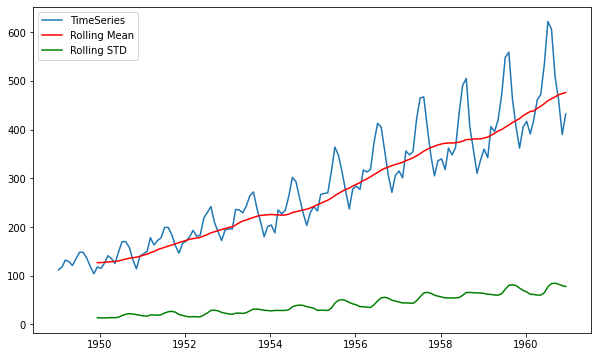

In [15]:
test_stationary(ts)

Result of Dickey - Fuller Test:-
------------------------------
Test Statistic           -1.717017
p-value                   0.422367
Lag                      13.000000
No. of observations     130.000000
Critical value (1%)      -3.481682
Critical value (5%)      -2.884042
Critical value (10%)     -2.578770
dtype: float64

Conclusion:
TimeSeries is non-Stationary


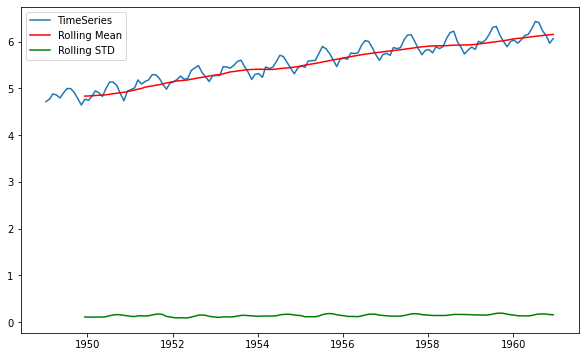

In [16]:
test_stationary(ts_log)

In [17]:
ts_log_moving_avg = ts_log.rolling(window=12, center=False).mean()
ts_log_diff = ts_log - ts_log_moving_avg
ts_log_diff.head(15)

Month
1949-01-10         NaN
1949-02-10         NaN
1949-03-10         NaN
1949-04-10         NaN
1949-05-10         NaN
1949-06-10         NaN
1949-07-10         NaN
1949-08-10         NaN
1949-09-10         NaN
1949-10-10         NaN
1949-11-10         NaN
1949-12-10   -0.065494
1950-01-10   -0.093449
1950-02-10   -0.007566
1950-03-10    0.099416
Name: #Passengers, dtype: float64

In [18]:
ts_log_diff.dropna(inplace=True)
ts_log_diff.isnull().sum()

0

Result of Dickey - Fuller Test:-
------------------------------
Test Statistic           -3.162908
p-value                   0.022235
Lag                      13.000000
No. of observations     119.000000
Critical value (1%)      -3.486535
Critical value (5%)      -2.886151
Critical value (10%)     -2.579896
dtype: float64

Conclusion:
TimeSeries is Stationary


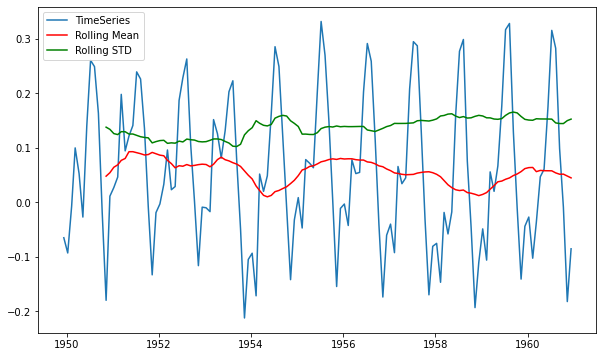

In [19]:
test_stationary(ts_log_diff)

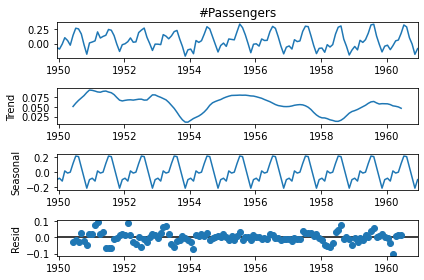

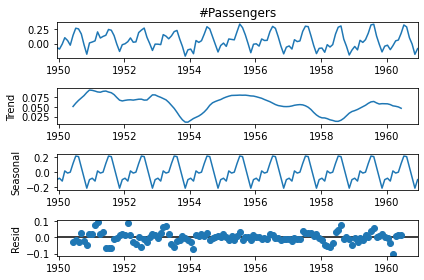

In [20]:
ts_log_d = seasonal_decompose(ts_log_diff, model='additive', period=12)
ts_log_d.plot()

#### Detecting outliers

In [21]:
import seaborn as sns

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='#Passengers'>

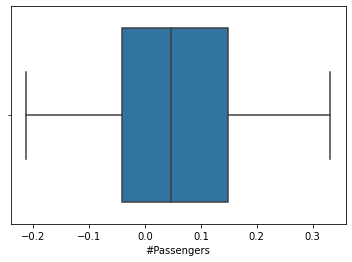

In [22]:
sns.boxplot(ts_log_diff)

#### ACF & PACF Plot

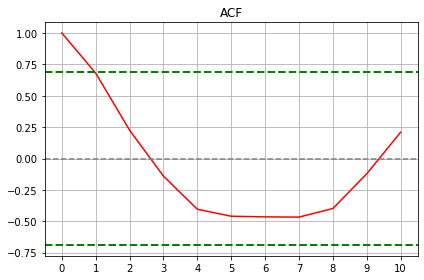

In [23]:
plt.plot(acf(ts_log_diff, nlags=10), c='r')
plt.xticks(np.arange(0,11,1))
plt.title('ACF')
plt.axhline(y=0, linestyle='--', c='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_diff)), linestyle='--', linewidth=2, c='green')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_diff)), linestyle='--', linewidth=2, c='green')
plt.grid()
plt.tight_layout()
plt.show()

## From ACF Plot, the curve intersects upper confidence line between 0 & 1. So, 'q' can be either 0 or 1

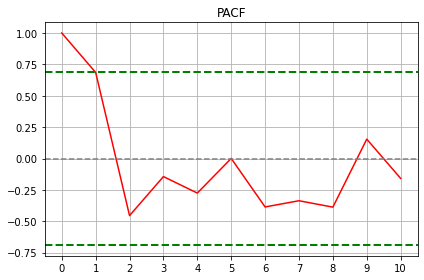

In [24]:
plt.plot(pacf(ts_log_diff, nlags=10), c='r')
plt.xticks(np.arange(0,11,1))
plt.title('PACF')
plt.axhline(y=0, linestyle='--', c='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_diff)), linestyle='--', linewidth=2, c='green')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_diff)), linestyle='--', linewidth=2, c='green')
plt.grid()
plt.tight_layout()
plt.show()

## From PACF Plot, the curve intersects y=0 line between 1 & 2 lags. So, 'p' can be either 1 or 2

# ARIMA MODEL

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


R2-score:  44.87


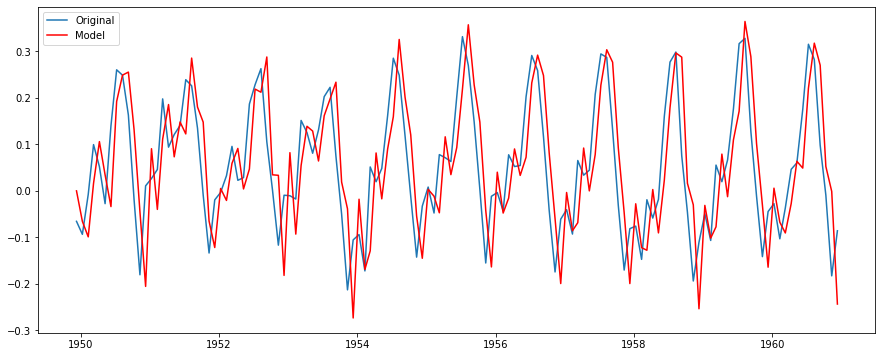

In [40]:
model = ARIMA(ts_log_diff, order=(1, 1, 1)) # (p, d, q)
model_fit = model.fit()
plt.figure(figsize=(15,6))
plt.plot(ts_log_diff, label='Original')
plt.plot(model_fit.fittedvalues, c='r', label='Model')
plt.legend(loc='best')
print('R2-score: ', round(r2_score(ts_log_diff, model_fit.fittedvalues)*100, 2))

# SARIMAX MODEL

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


R2-score:  83.49


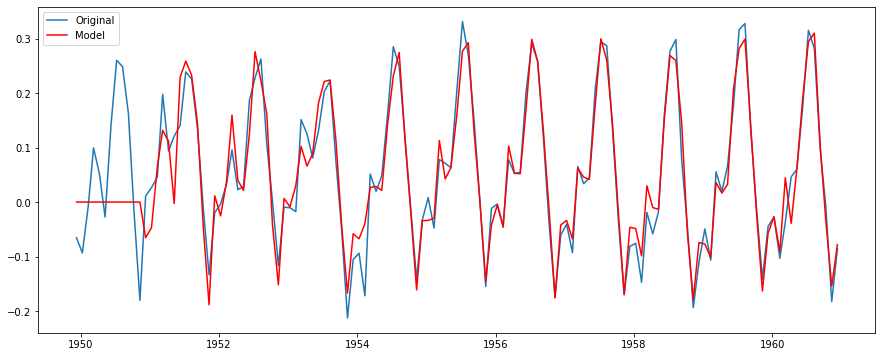

In [41]:
model2 = sm.tsa.statespace.SARIMAX(ts_log_diff, seasonal_order=(1, 1, 1, 12)) # (p, d, q, s)
model_fit2 = model2.fit()
plt.figure(figsize=(15,6))
plt.plot(ts_log_diff, label='Original')
plt.plot(model_fit2.fittedvalues, c='r', label='Model')
plt.legend(loc='best')
print('R2-score: ', round(r2_score(ts_log_diff, model_fit2.fittedvalues)*100, 2))